# Dataset

Para o nosso trabalho escolhemos o dataset **_Water Quality_**(https://www.kaggle.com/adityakadiwal/water-potability) que o reúne os amostras de 3276 corpos de água diferentes. O dataset é composto por 10 atributos:

 <ul><li>ph: 
        <ul>
            <li>tipo inteiro</li>
            <li>Mede o nível de acidez e basicidade da água  </li>
            <li>valores entre 0 e 14 </li>
        </ul>
    </li>
    <li>Hardness: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede o nivel de concentracao de cálcio e magnésio</li>
            <li>Medidos em mg/L (miligramas por litro)</li>
        </ul>
    </li>
    <li>Solids: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de sulfatos na água  </li>
            <li>Medidos em mg/l</li>
        </ul>
    </li>
    <li>Solids: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de sólidos dissolvidos  </li>
            <li>Medidos em ppm(partes por milhão)</li>
        </ul>
    </li>
    <li>Chloramines: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de cloraminas </li>
            <li>Medidos em ppm</li>
        </ul>
    </li>
    <li>Conductivity: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Condutividade elétrica da água  </li>
            <li>Medida em S/cm (microsiemens por centímetro) </li>
        </ul>
    </li>
    <li>Organic_carbon: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede a quantidade de carbono orgânico </li>
            <li>Medido em mg/L</li>
        </ul>
    </li>
    <li>Trihalomethanes: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede a quantidade de THMs  </li>
            <li>Medidos em ppm  </li>
        </ul>
    </li>
    <li>Turbidity: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede as propriedades de emissão de luz </li>
            <li>Medido em NTU </li>
        </ul>
    </li>
    <li>Potability: 
        <ul>
            <li>tipo inteiro</li>
            <li>Indica se a água é potável ou não</li>
            <li>Valores 1 ou 0 </li>
        </ul>
    </li>
    
 </ul>


# Implementação

A implementação segue a ideia geral do trabalho inicial, importando o pandas e algumas funções do sk.learn para realizarmos o aprendizado através da árvore de decisão.

## Imports das bibliotecas necessárias


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

##Declaração de funções auxiliares

In [22]:
def especificidade(matriz):
    v_N = matriz[0, 1]
    N = matriz[0, 1]+matriz[1, 1]
    return v_N/N


def soma_array(array):
    soma = 0
    for i in array:
        soma += i
    return soma


def repeat_array(item, tam):
    array = []
    for i in range(0, tam):
        array.append(item)
    return array


def show_acuracias(acuracias):
    media1 = soma_array(acuracias)/len(acuracias)
    medias1 = repeat_array(media1, 10)
    plt.plot(range(1, 11), medias1, 'r--', label="Média")
    plt.scatter(range(1, 11), acuracias, label="Acurácias")
    plt.legend(title="")
    plt.title("Média das acurárias")
    plt.show()


def show_especificididades(especificidades):
    media2 = soma_array(especificidades)/len(especificidades)
    medias2 = repeat_array(media2, 10)
    plt.plot(range(1, 11), medias2, 'r--', label="Média")
    plt.scatter(range(1, 11), especificidades, label="Especificidades")
    plt.legend(title="")
    plt.title("Média das especificidades")
    plt.show()


def show_overfitting(especificidades_teste,especificidades_treino):
    plt.plot(range(1,11),especificidades_teste,especificidades_treino)

## Import do Dataset

In [23]:
# Nome das colunas
colunas = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
           'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']
# Import do csv
dataset = pd.read_csv("water_potability.csv", header=None, names=colunas)

dataset.head()

ph    hardness        solids  chloramines     sulfate  conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Tratamento do Dataset
Temos logo de cara que a primeira linha não consiste em dados mas sim o nome dos atributos, logo vamos remove-la. Também prcebemos que tínhamos valores nulos e precisavamos quantifica-los para ver seu impacto dependendo do que fizesemos com ele. e resolvemos não usar essas instâncias dado que mesmo sem elas ainda teríamos uma quantidade satisfatória para realizarmos o aprendizado.

In [24]:
total = np.product(dataset.shape)
nulos = dataset.isnull().sum().sum()
print(f"Percentagem de nulos {((nulos/total) * 100):.2f} %")

Percentagem de nulos 4.38 %


In [25]:
# Limpando o Dataset
# retiramos a primeira linha com os nomes
dataset = dataset.drop(labels=0,axis=0)
# por serem apenas 4% resolvemos por apenas retirar os valores nulos do dataset
dataset = dataset.dropna()

# Por fim alocar os dados
# Separação dos atributos
X = dataset[['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
             'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']]
Y = dataset.potability

Após a limpeza, o nosso dataset ainda contém 2011 entradas, o que achamos suficientes para elaborar um modelo.

##Separação treino/teste
Decidimos utilizar o método k-fold, com k = 10, diretamente deixando sempre os parametros *random_state* e *suffle* como TRUE. Isso pois, o dataset está ordenado por potabilidade. Assim, primeiro estão armazanadas todas as não potáveis e depois as potáveis. Dessa forma acreditamos que randomizar o conjunto antes de fazer a separação nos da uma melhor chande de conseguir boas métricas.

In [26]:
kf = KFold(n_splits=10,random_state=True,shuffle=True)

In [31]:
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz

#def run_decisiontree(kfold,depth,show_tree)
clf = DecisionTreeClassifier(criterion="entropy")
acuracias = []
especificidades = []
clfs = []
for train, test in kf.split(X=X, y=Y):
    X_train = X.iloc[train]# Conjunto de treino X
    Y_train = Y.iloc[train]
    X_test = X.iloc[test]
    Y_test = Y.iloc[test]

    clf.fit(X_train, Y_train)
    Y_pred_teste = clf.predict(X_test)
    acuracias.append(metrics.accuracy_score(Y_test, Y_pred_teste))
    especificidades.append(especificidade(metrics.confusion_matrix(Y_test,Y_pred_teste)))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=X.columns, class_names=['Nao', 'Yes','talvez'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arvore1.png')
Image(graph.create_png())


# Mostrando Resultados
Escolhemos como métricas relevantes a acurácia e a especificidade. Escolhemos a acrurácia pois como foi a métrica mas comumente usada nas aulas e nos exemplos, nos dava um bom indicador da situação do nosso modelo. A escolha da especificidade, que é nossa métrica principal, pois, dada a natureza do nosso dataset, acreditamos que mais importante de saber se um corpo de água é potável é saber se ele é impróprio para consumo

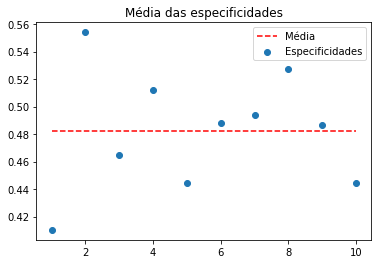

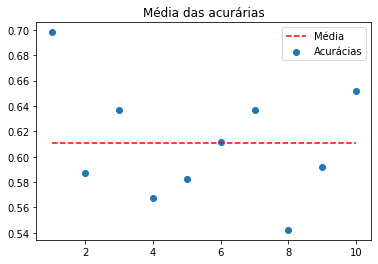

In [28]:
show_especificididades(especificidades)
show_acuracias(acuracias)